In [57]:
# general purpose data manipulation and analysis
import numpy as np

# packages for working with raster datasets
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.enums import Resampling

import xarray # allows us to work with raster data as arrays

# packages for working with geospatial data
import geopandas as gpd
#import pycrs

from shapely.geometry import box

# import packages for viewing the data
import matplotlib.pyplot as pyplot


In [58]:
#define paths
import os
CURDIR = os.path.dirname(os.path.realpath("__file__"))

In [59]:
# matplotlib functionality
%matplotlib inline
# %matplotlib notebook

In [60]:
# open the raster
fparts_SD_GM_3m_1 = "data/ASO_GrandMesa_2020Feb1-2_snowdepth_3m_clipped.tif"
fparts_SD_GM_3m_2 = "data/ASO_GrandMesa_2020Feb13_snowdepth_3m.tif"


SD_GM_3m_1 = rasterio.open(fparts_SD_GM_3m_1)
SD_GM_3m_2 = rasterio.open(fparts_SD_GM_3m_2)

In [61]:
# check the CRS - is it consistent with other datasets we want to use?
SD_GM_3m_1.crs
SD_GM_3m_2.crs

CRS.from_epsg(32612)

In [62]:
SD_GM_3m_1.res
SD_GM_3m_2.res

(3.0, 3.0)

In [63]:
SD_GM_3m_1.bounds
SD_GM_3m_2.bounds

BoundingBox(left=737454.0, bottom=4319634.0, right=760182.0, top=4330218.0)

In [64]:
print(SD_GM_3m_1.width,SD_GM_3m_1.height)
print(SD_GM_3m_2.width,SD_GM_3m_2.height)

2667 1667
7576 3528


<AxesSubplot:>

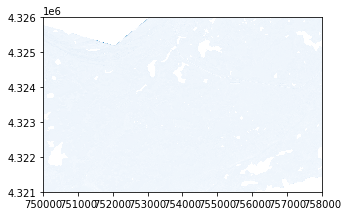

In [65]:
fig1, ax1 = pyplot.subplots(1, figsize=(5, 5))
show((SD_GM_3m_1, 1), cmap='Blues', interpolation='none', ax=ax1)

<AxesSubplot:>

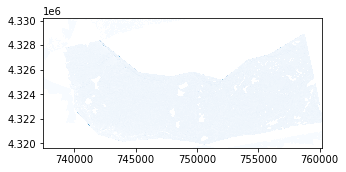

In [66]:
fig1, ax1 = pyplot.subplots(1, figsize=(5, 5))
show((SD_GM_3m_2, 1), cmap='Blues', interpolation='none', ax=ax1)

In [67]:
# First, close the rasterio file
SD_GM_3m.close()

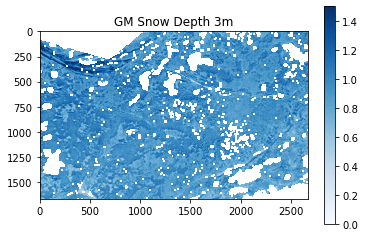

In [68]:
dat_array_3m_1 = xarray.open_rasterio(fparts_SD_GM_3m_1)
dat_array_3m_2 = xarray.open_rasterio(fparts_SD_GM_3m_2)
# plot the raster 

fig2, ax2 = pyplot.subplots()
pos2 = ax2.imshow(dat_array_3m_1.data[0,:,:], cmap='Blues', vmin=0, vmax=1.5);
ax2.set_title('GM Snow Depth 3m')
fig2.colorbar(pos2, ax=ax2)

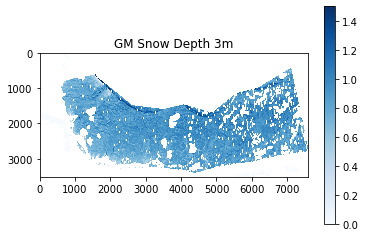

In [69]:
# plot the raster 

fig2, ax2 = pyplot.subplots()
pos2 = ax2.imshow(dat_array_3m_2.data[0,:,:], cmap='Blues', vmin=0, vmax=1.5);
ax2.set_title('GM Snow Depth 3m')
fig2.colorbar(pos2, ax=ax2)

In [72]:
## mean
np.nanmean(dat_array_3m_1)

0.93856347

In [71]:
np.nanmean(dat_array_3m_2)

0.7725496